<div align="center">
    <h1>Amiya Das (22ce01057)</h1>
    <h3>Assignment-1</h3>
</div>   

<h3>Question-3</h3>

3.) Consider that the velocity of water particles in a river is described by the vector field  $f =e^xy^2e_1 +(x+2y)e_2$ . 

(a) Plot the given vector field in Julia. (you may use the package called **Plots.jl** or **CalculusWithJulia.jl**).

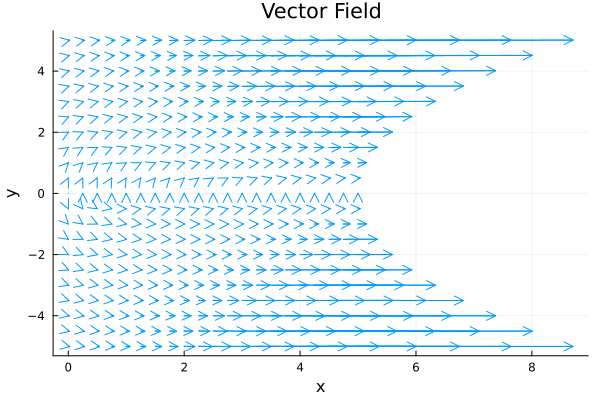

In [7]:
using Plots
using CalculusWithJulia
using LaTeXStrings
using Symbolics

# Plots.GRBackend()
gr()

# Initializing the equation
velocity(x,y) = [(exp(x)*(y^2)) , (x + (2*y))]
velocity(v) = velocity(v...)

# Limit of vectors in x and y direction
xlim =(0,5)
ylim =(-5,5)

# number of x and y values
nx =20
ny =20

# Data value for the Plot
dx, dy = (xlim[2]-xlim[1])/nx, (ylim[2]-ylim[1])/ny
xs, ys = xlim[1]:dx:xlim[2], ylim[1]:dy:ylim[2]

# Points
ps = [[x,y] for x in xs for y in ys];

# value of velocity vector at each point ps
vs = (velocity).(ps);

# scaling down the vector
λ = 0.001
vx, vy = unzip(vs)
vx_scaled = λ .* vx
vy_scaled = λ .* vy

# Plotting the vector field
Qa = quiver(unzip(ps)..., quiver=(vx_scaled, vy_scaled),
        xlabel="x", ylabel="y",
        title="Vector Field")

# Saving as png
savefig(Qa, "Vector_Field(a).png")
display(Qa)

 (b) Plot the divergence of the vector field using automatic divergence calculation available in the Julia
 package called **CalculusWithJulia.jl**. Also, determine the divergence using the detailed calculation
 and plot the same. Compare both plots and verify the results.

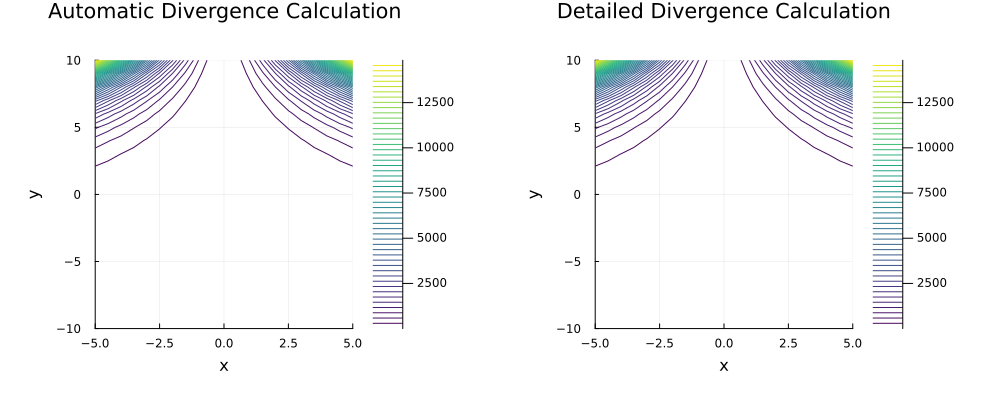

In [68]:
using Plots
using CalculusWithJulia
using LaTeXStrings
using Symbolics
using Measures

# Plots.GRBackend()
gr()

# Initializing the equation
velocity(x,y) = [(exp(x)*(y^2)) , (x + (2*y))]
velocity(v) = velocity(v...)

# Limit of vectors in x and y direction
xlim =(-5,5)
ylim =(-10,10)

# number of x and y values
nx =20
ny =20

# Data value for the Plot
dx, dy = (xlim[2]-xlim[1])/nx, (ylim[2]-ylim[1])/ny
xs, ys = xlim[1]:dx:xlim[2], ylim[1]:dy:ylim[2]

# Points
ps = [[x,y] for x in xs for y in ys];

# Automatic Divergence calculation
vd = divergence(velocity).(ps)

# Detailed Divergence calculation
@variables x y
Dx = Differential(x)
Dy = Differential(y)
v_sym = velocity(x, y)
cDiv_expr = expand_derivatives(Dx(v_sym[1])) + expand_derivatives(Dy(v_sym[2]))
# cDiv_func = eval(build_function([x, y], cDiv_expr)[1])
# cDiv_func = eval(build_function([x, y], cDiv_expr, expression=Val{false})[1])
# cDiv = cDiv_func.(ps)
# cDiv = [cDiv_func(p[1], p[2]) for p in ps]
div(x,y) = (2 + ((y^2)*exp(x)))
div(v) = div(v...)
cDiv = div.(ps);

# Contour plot
Plot = plot(
    # Automatic Divergence
    contour(xs, ys, vd, nlevels=50,
        xlabel="x", ylabel="y",
        title="Automatic Divergence Calculation",
        color=:viridis),

    # Manual Divergence
    contour(xs, ys, cDiv, nlevels=50,
        xlabel="x", ylabel="y",
        title="Detailed Divergence Calculation",
        color=:viridis),

    layout=(1, 2),
    margin=10mm,
    size=(1000, 400)
)

# Saving as png
savefig(Plot, "Divergence_Plot(b).png")
display(Plot)

 (c) Determine the curl of the vector field using automatic curl calculation available in the Julia package
 **CalculusWithJulia.jl**. Also, determine the curl using detailed calculation and plot the same. Compare
 both plots and verify the results.

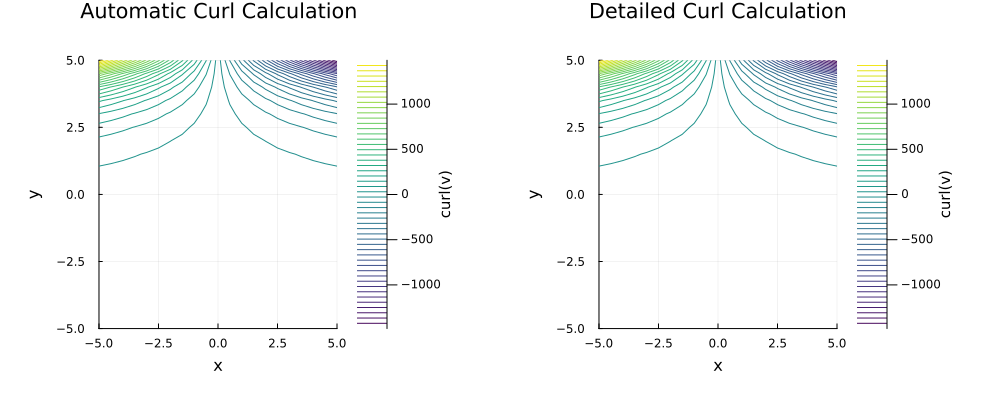

In [73]:
using Plots
using CalculusWithJulia
using LaTeXStrings
using Symbolics
using Measures

# Plots.GRBackend()
gr()

# Initializing the equation
velocity(x,y) = [(exp(x)*(y^2)) , (x + (2*y))]
velocity(v) = velocity(v...)

# Limit of vectors in x and y direction
xlim =(-5,5)
ylim =(-5,5)

# number of x and y values
nx =20
ny =20

# Data value for the Plot
dx, dy = (xlim[2]-xlim[1])/nx, (ylim[2]-ylim[1])/ny
xs, ys = xlim[1]:dx:xlim[2], ylim[1]:dy:ylim[2]

# Points
ps = [[x,y] for x in xs for y in ys];

# Automatic Curl calculation
vd = curl(velocity).(ps)

# Detailed Curl calculation
@variables x y
Dx = Differential(x)
Dy = Differential(y)
v_sym = velocity(x, y)
curl_expr = expand_derivatives(Dx(v_sym[2])) - expand_derivatives(Dy(v_sym[1]))
# if all(v -> v in vars_in_expr, [x, y])
#     curl_func = eval(build_function([x, y], curl_expr)[1])
#     Calc_curl = curl_func.(ps)
#     println("curl_func created successfully")
# else
#     println("Expression does not depend on both x and y; cannot make function")
#     Calc_curl = curl_expr
# end
curl_exp(x,y) = (1 - (2*y*exp(x)))
curl_exp(v) = curl_exp(v...)
Calc_curl = curl_exp.(ps)

# Contour plot
Plot = plot(
    # Automatic Divergence
    contour(xs, ys, vd, nlevels=50,
        xlabel="x", ylabel="y",
        title="Automatic Curl Calculation",
        colorbar_title="curl(v)",
        color=:viridis),

    # Detailed Divergence
    contour(xs, ys, Calc_curl, nlevels=50,
        xlabel="x", ylabel="y",
        title="Detailed Curl Calculation",
        colorbar_title="curl(v)",
        color=:viridis),

    layout=(1, 2),
    margin=10mm,
    size=(1000, 400)
)

# Saving as png
savefig(Plot, "Curl_Plot(c).png")
display(Plot)